# Analysis of Automobile Inventory Data

## Copyright (c) 2018, Faststream Technologies
## Author: Sudhanva Narayana

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

### CURR and PARENT directory constants

In [225]:
CURR_DIR = os.path.dirname(os.path.abspath('__file__'))
PARENT_DIR = os.path.abspath(os.path.join(CURR_DIR, os.pardir))

### Import dataset ignoring headers

In [226]:
df = pd.read_excel(PARENT_DIR + '\\assets\\data\\items_analysis.xlsx', sheet_name='Sheet1')

### Dataset

In [227]:
df.head()

,Item_Number,Make_Or_Buy_Flag,Minimum_Order_Quantity,Standard_Cost,Ordered_Quantity,Month,Request_Date,Cumulative LT
0,066.01.374.1.37,Make,NaN,1027.19182,2,2015-08,2015-08-24 00:00:00,76.986458
1,066.322.002,Buy,5.0,893.80000,2,2015-01,2015-01-23 00:00:00,156.000000
2,066.322.002,Buy,5.0,893.80000,2,2015-01,2014-12-22 15:09:00,156.000000
3,066.322.002,Buy,5.0,893.80000,4,2015-09,2015-09-16 00:00:00,156.000000
4,066.322.002,Buy,5.0,893.80000,2,2015-02,2015-01-28 00:00:00,156.000000


In [228]:
# Convert uppercase to lowercase and replace empty spaces with underscore
df.columns = [i.replace(" ", "_").lower() for i in df.columns]
df.columns

Index(['item_number', 'make_or_buy_flag', 'minimum_order_quantity',
       'standard_cost', 'ordered_quantity', 'month', 'request_date',
       'cumulative_lt'],
      dtype='object')

In [229]:
# Convert 'month' and 'reqeust date' to datetime and remove time by normalization
df['month'] = pd.to_datetime(df['month'])
df['request_date'] = (pd.to_datetime(df['request_date'])).dt.normalize()

In [230]:
# Create 'Buy' and 'Make' dataframe and remove 'make_or_buy_flag'
df_buy = df[df['make_or_buy_flag'] == 'Buy'].drop('make_or_buy_flag', axis=1)
df_buy = df_buy.fillna(df_buy.mean().astype(int))
df_make = df[df['make_or_buy_flag'] == 'Make'].drop(['make_or_buy_flag', 'minimum_order_quantity'], axis=1)
df_make = df_make.fillna(df_make.mean().astype(int))

In [231]:
# Grouping by Item
df_buy = df_buy.groupby('item_number').mean()
df_make = df_make.groupby('item_number').mean()

In [232]:
# Importing the dataset
X = df_buy.iloc[:, 2].values
y = df_buy.iloc[:, 3].values

In [233]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
X_train, X_test, y_train, y_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1), y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [234]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [235]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

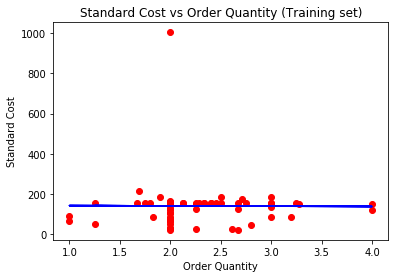

In [236]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Standard Cost vs Order Quantity (Training set)')
plt.xlabel('Order Quantity')
plt.ylabel('Standard Cost')
plt.show()

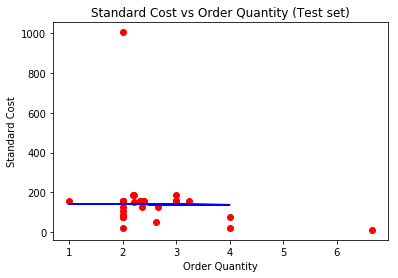

In [237]:
# Visualising the Training set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Standard Cost vs Order Quantity (Test set)')
plt.xlabel('Order Quantity')
plt.ylabel('Standard Cost')
plt.show()